In [156]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

In [158]:
df = pd.read_csv('Covid_Data.csv')

In [160]:
print(df.isnull().sum())

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


In [162]:
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].fillna(99).astype(int)


In [143]:
print(df.describe())

              USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE       INTUBED  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.632194e+00  8.980565e+00  4.992595e-01  1.907646e-01  9.679031e-01   
std    4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01  1.762575e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  4.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
50%    2.000000e+00  1.200000e+01  0.000000e+00  0.000000e+00  1.000000e+00   
75%    2.000000e+00  1.200000e+01  1.000000e+00  0.000000e+00  1.000000e+00   
max    2.000000e+00  1.300000e+01  1.000000e+00  1.000000e+00  1.000000e+00   

          PNEUMONIA           AGE      PREGNANT      DIABETES          COPD  \
count  1.048575e+06  1.048354e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   8.664492e-01  4.178230e+01  9.958258e-01  8.839845e-01  9.884996e-01   
std    3.401692e-01  1.688961e+01  1.063815e-01  3.

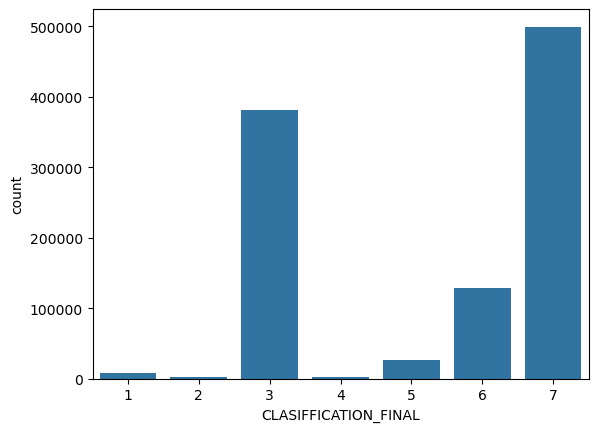

In [164]:
sns.countplot(x='CLASIFFICATION_FINAL', data=df)
plt.show()

In [168]:
# Handle the 'DATE_DIED' column (skip this if it doesn't exist)
if 'DATE_DIED' in df.columns:
    df['DIED'] = np.where(df['DATE_DIED'] != '9999-99-99', 1, 0)
    df = df.drop('DATE_DIED', axis=1)


In [170]:
print(df.columns)


Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DIED'],
      dtype='object')


In [172]:
# Replace 97 and 99 in Boolean columns with NaN
boolean_columns = ['SEX', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 
                   'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 
                   'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'INTUBED', 'PNEUMONIA', 
                   'PATIENT_TYPE']
df[boolean_columns] = df[boolean_columns].replace({97: np.nan, 99: np.nan})

In [174]:
imputer = SimpleImputer(strategy='most_frequent')
df[boolean_columns] = imputer.fit_transform(df[boolean_columns])


In [176]:
# Impute remaining missing values in numerical columns if any
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
imputer_numeric = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])


In [178]:
le = LabelEncoder()
for col in boolean_columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [180]:
# Extract features and target
X = df.drop('CLASIFFICATION_FINAL', axis=1)
y = df['CLASIFFICATION_FINAL']

In [182]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

In [186]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
rfe = RFE(model, n_features_to_select=15)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got [1 2 3 4 5 6 7]